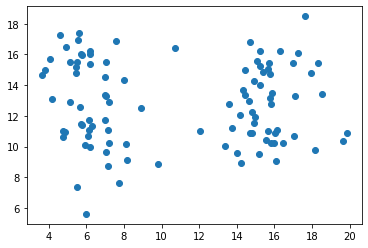

In [1]:
import numpy as np 
from matplotlib import pyplot
N = 100
 
mean1 = [6, 15] 
mean2 = [6, 11] 
 
mean3 = [16,15] 
mean4 = [16,11] 
 
cov = [[2, 0], [0, 2]] 
 
np.random.seed(50) 
X = np.random.multivariate_normal( mean1, cov, int(N/4)) 
X = np.concatenate ((X, np.random.multivariate_normal ( mean2, cov, int(N/4)))) 
X = np.concatenate ((X, np.random.multivariate_normal ( mean3, cov, int(N/4)))) 
X = np.concatenate ((X, np.random.multivariate_normal ( mean4, cov, int(N/4)))) 
pyplot.scatter(X[:,0], X[:,1])

K-means 

In [2]:
def distance_cal(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def K_means(data, K, iter_value):
#     data: input dataset
#     K: how many clusters you want to distribute, max K = 7
#     iter_value: steps for iteration
    centers = {}
    for i in range(K):
#         centers[i] = data[np.random.randint((len(data)))]
#         generate 4 initial center points
        centers[i] = np.random.uniform(low=data.min(), high=data.max(), size=(1,))
    category ={} 
    for j in range(K):
        category[j] = []
        
    categoryNew ={}
    for j in range(K):
        categoryNew[j] = []
        
    for i in range(iter_value):
        for feature in data:
            distances = []
            for center in centers:
                distances.append(distance_cal(feature,centers[center]))
                # np.linalg.norm also works 
                # distances.append(np.linalg.norm(feature - centers[center]))
            classification = distances.index(min(distances))
            category[classification].append(feature)
    # update centroid
        for cat in category:
            sumTemp = np.zeros(2)
            for point in category[cat]:
                sumTemp += np.array(point)
            # latest centroid
            centers[cat] = sumTemp / len(category[cat])

    newcenters = {}      
    newcenters = centers
    for feature in data:
        distancesNew = []
        for center in newcenters:
            distancesNew.append(distance_cal(feature,centers[center]))
            # distancesNew.append(np.linalg.norm(feature - centers[center]))
        classification = distancesNew.index(min(distancesNew))
        categoryNew[classification].append(feature)

# max clusters = 7. ADD MORE colors which allows classify into more clusters
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
    for cat in categoryNew:
        for point in categoryNew[cat]:
            pyplot.scatter(point[0], point[1], c=colors[cat])
                
    for center in newcenters:
        print(newcenters[center])
        pyplot.scatter(newcenters[center][0], newcenters[center][1], marker='+', s=200,c = 'k')

##################    SSE    ##################
    SSE_value =0
    for nc in newcenters:
        for point in categoryNew[nc]:
            tempValue =np.sum((point[0]-newcenters[nc][0])**2 + (point[1]-newcenters[nc][1])**2)
            SSE_value += tempValue
    print('SSE value is:', SSE_value)

<ipython-input-2-248780b8ad81>:36: RuntimeWarning: invalid value encountered in true_divide
  centers[cat] = sumTemp / len(category[cat])


[ 6.27574425 12.80456342]
[nan nan]
[15.95143883 15.30157855]
[15.47333702 11.27579266]
SSE value is: 715.4447361645701


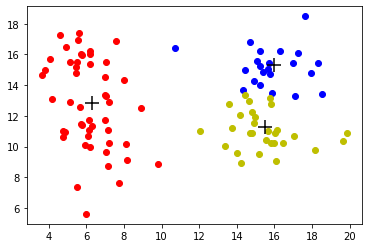

In [3]:
K_means(X,4,50)


As the result shows, at the SSE value equals about 400, the clustering is considered well. The reason why each runtime can have a different result in clustering is the initial centroids are chosen randomly. If a random point happens to be fallen near an outlier (noise), the clustering result may perform worse, even if the value of iteration is set very high.

K-means++ 

In [4]:
def distance_cal(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def K_means_PlusPlus(data, k):
    # data: input dataset
    # K: how many clusters
    centers = {}
    # Select an initial point at random to be the first centroid
    P1 = data[np.random.randint((len(data)))]
    centers[0] = P1
    dist = 0
    sum_dist = 0
    probility = 0
    tempProb = 0
    probilitySum = 0
    distMatrix = np.zeros(len(data))
    probilityMatrix = np.zeros(len(data))
    randomArray = np.random.random_sample(3)
#     randomArray = np.random.uniform(low=0, high=0.85, size=(3,))
    cnt = 0
    for i in data:
        dist = distance_cal(i, P1)
        sum_dist += dist**2
        cnt+=1

    cnt = 0
    for i in data:
        dist = distance_cal(i, P1)
        tempProb = (dist**2) / sum_dist
        probilityMatrix[cnt] = tempProb
        probilitySum += tempProb
        cnt += 1

#    roulette wheel selection 判断点落在哪个区间内
    dataIndex = -1
    sumPx = 0
    for i in range(len(probilityMatrix)):
        if (randomArray[0] > sumPx):
            sumPx = sumPx + probilityMatrix[i]
            dataIndex += 1
    #     the second centroid
    P2 = data[dataIndex]
    centers[1] = data[dataIndex]
    
#     --------------------------------------
    cnt = 0
    max_dist =0
    sum_dist = 0
    probilitySum =0 
    dist = 0
    for i in data:
        distTo1 = distance_cal(i, P1)
        distTo2 = distance_cal(i, P2)
        dist = min(distTo1, distTo2)
        distMatrix[cnt] = (dist**2)
        cnt += 1
 
    cnt = 0
    for i in distMatrix:
        sum_dist += i

    for i in distMatrix:
        tempProb = i / sum_dist
        probilityMatrix[cnt] = tempProb
        probilitySum += tempProb
        cnt += 1 

    #  roulette wheel selection 判断点落在哪个区间内
    dataIndex = -1
    sumPx = 0
    for i in range(len(probilityMatrix)):
        if (randomArray[1] > sumPx):
            sumPx = sumPx + probilityMatrix[i]
            dataIndex += 1
    #   the third centroid
    P3 = data[dataIndex]
    centers[2] = data[dataIndex]

# -----------------------------------------------
    cnt = 0
    max_dist =0
    sum_dist = 0
    probilitySum =0 
    dist = 0
    for i in data:
        distTo1 = distance_cal(i, P1)
        distTo2 = distance_cal(i, P2)
        distTo3 = distance_cal(i, P3)
        dist = min(distTo1, distTo2, distTo3)
        distMatrix[cnt] = (dist**2)
        cnt += 1
    
    cnt = 0
    for i in distMatrix:
        sum_dist += i
    
    cnt = 0
    for i in distMatrix:
        tempProb = i / sum_dist
        probilityMatrix[cnt] = tempProb 
        probilitySum += tempProb 
        cnt += 1

    #  roulette wheel selection 判断点落在哪个区间内
    dataIndex = -1
    sumPx = 0
    for i in range(len(probilityMatrix)):
        if (randomArray[2] > sumPx):
            sumPx = sumPx + probilityMatrix[i]
            dataIndex += 1
    #    the forth centroid
    P4 = data[dataIndex]
    centers[3] = data[dataIndex]

#     clustering
    categoryNew ={}
    for j in range(k):
        categoryNew[j] = []
    for feature in data:
        distancesNew = []
        for center in centers:
            distancesNew.append(distance_cal(feature,centers[center]))
        classification = distancesNew.index(min(distancesNew))
        categoryNew[classification].append(feature)
        
    # max clusters k = 4.
    colors = ['r', 'g', 'b', 'y']
    for cat in categoryNew:
        for point in categoryNew[cat]:
            pyplot.scatter(point[0], point[1], c=colors[cat])
        
    for center in centers:
        print(centers[center])
        pyplot.scatter(centers[center][0], centers[center][1], marker='+', s=200,c = 'k')
        
        ##################    SSE    ##################
    SSE_value =0
    for nc in centers:
        for point in categoryNew[nc]:
            tempValue =np.sum((point[0]-centers[nc][0])**2 + (point[1]-centers[nc][1])**2)
            SSE_value += tempValue
    print('SSE value is:', SSE_value)
#     return SSE_value

[17.02611585 10.70644259]
[ 6.17517334 16.05045718]
[ 5.76728358 11.39343339]
[15.24970695 16.19125657]
SSE value is: 524.4271963584138


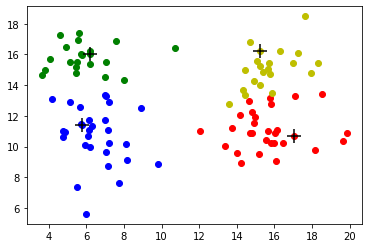

In [6]:
K_means_PlusPlus(X,4)


For the aspect of quantitatively, both K-means and K-means++ can find a proper centroid position for clustering. For this dataset, the SSE value evaluated by the K-means++ method performs not well, I think is because the K-means++ method finds centroid points based on the points' position in the dataset and this dataset used for analysis is a little bit dispersive, hence the probability in choosing an outlier as centroid is high for k-means++ method.

For the aspect of qualitatively, K-means method can determine centroids by doing as many iterations but it may produce different results because choosing a center point is random. K-means method is also very sensitive to outliers and noise and is more likely to form a globular clustering, which is the weakness of K-means.

Speaking of K-means++, the improvement is that the distance between initial cluster centers should be as far as possible. As the figure shows, we can find it 4 center points of clusters are in a good position. K-means++ method still is affected by outliers and noise, if a preprocessing procedure can be done to a dataset like removing some far-away outliers, the centroid position would be much better.